## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 002A

## Part A - Load Libraries

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature
from math import sqrt

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Load the Sickness dataset

In [2]:
fileName = '../../Data/Sickness05.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Sickness05.csv


In [3]:
sickdf= pd.read_csv(fileFullName, header=0)
print(sickdf.shape)
print(sickdf.columns)

(442, 16)
Index(['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10',
       'F11', 'F12', 'T01', 'T02', 'T03', 'T'],
      dtype='object')


## Part C - Use only one feature = F03

In [4]:
sickness_X = sickdf[['F03']].copy(deep=True)
sickness_X.columns = (['F'])

In [5]:
print(sickness_X.shape)

(442, 1)


In [6]:
print(sickness_X.describe())

                  F
count  4.420000e+02
mean   1.131221e-11
std    4.761905e-02
min   -9.027530e-02
25%   -3.422907e-02
50%   -7.283766e-03
75%    3.124802e-02
max    1.705552e-01


## Part D - Extract train feature set

In [7]:
sickness_X_train = pd.DataFrame(sickness_X[:-50])

In [8]:
print(sickness_X_train.shape)

(392, 1)


## Part E - Extract the Test feature set

In [9]:
sickness_X_test = pd.DataFrame(sickness_X[-50:])

In [10]:
print(sickness_X_test.shape)

(50, 1)


## Part F - Split the targets into training/testing sets 

In [11]:
sickness_y = sickdf[['T02']].copy(deep=True)
sickness_y.columns = (['T'])

In [12]:
sickness_y_train = pd.DataFrame(sickness_y[:-50])

In [13]:
sickness_y_test = pd.DataFrame(sickness_y[-50:])

In [14]:
for i in range(5):
    print('Test Feature: % 8.4f results in target: % 1d' % (sickness_X_train['F'].iloc[i], sickness_y_train['T'].iloc[i]))

Test Feature:   0.0617 results in target:  1
Test Feature:  -0.0515 results in target:  0
Test Feature:   0.0445 results in target:  1
Test Feature:  -0.0116 results in target:  0
Test Feature:  -0.0364 results in target:  1


In [15]:
for i in range(5):
    print('Test Feature: % 8.4f results in target: % 1d' % (sickness_X_test['F'].iloc[i], sickness_y_test['T'].iloc[i]))

Test Feature:  -0.0299 results in target:  0
Test Feature:  -0.0461 results in target:  0
Test Feature:   0.0186 results in target:  1
Test Feature:   0.0013 results in target:  0
Test Feature:  -0.0310 results in target:  0


## Part G - Create linear regression object

In [16]:
regr = linear_model.LinearRegression(n_jobs=8, normalize=True)

In [17]:
print(regr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=True)


## Part H - Train the model using the training sets

In [18]:
regr.fit(sickness_X_train, sickness_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=True)

## Part I - Make predictions using the testing set

In [19]:
sickness_y_pred = regr.predict(sickness_X_test)

## Part J - The coefficients

In [20]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[1.15740949]]


## Part K - The mean squared error

In [21]:
meanSquaredError=mean_squared_error(sickness_y_test, sickness_y_pred)
print("Mean squared error (MSE): %0.4f"
      % meanSquaredError)

Mean squared error (MSE): 0.2473


In [22]:
rootMeanSquaredError = sqrt(meanSquaredError)
print("Root Mean Square Error (RMSE): %0.4f" % rootMeanSquaredError)

Root Mean Square Error (RMSE): 0.4973


## Part M - Explained variance score: 1 is perfect prediction

In [23]:
print('Variance score: %0.4f' % r2_score(sickness_y_test, sickness_y_pred))

Variance score: 0.0092


In [24]:
average_precision = average_precision_score(sickness_y_test, sickness_y_pred)

print('Average Precision Recall Score: {0:0.4f}'.format(average_precision))

Average Precision Recall Score: 0.6006


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.6006')

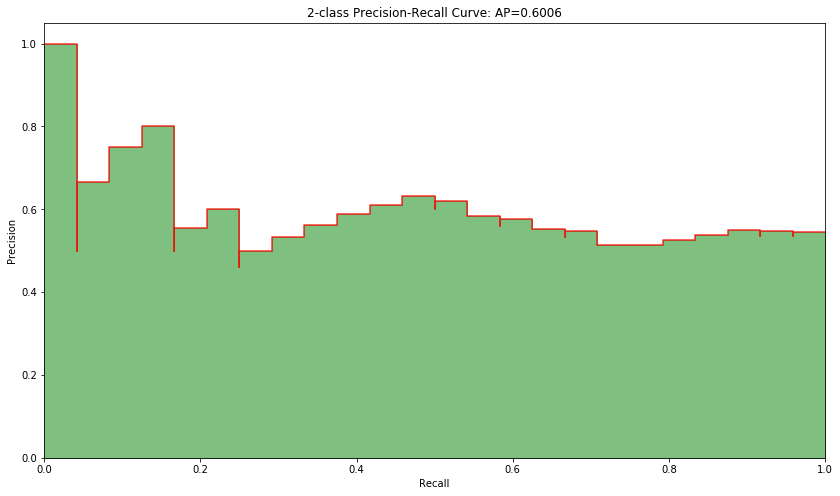

In [25]:
precision, recall, thresholds = precision_recall_curve(sickness_y_test, sickness_y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

fig1 = plt.figure(figsize=(14, 8))
plt.title('Water Sickness Precision Recall Curve')
plt.step(recall, precision, color='red', alpha=0.8,
         where='post')
plt.fill_between(recall, precision, alpha=0.5, color='green', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.4f}'.format(
          average_precision))

## Part N - Plot outputs

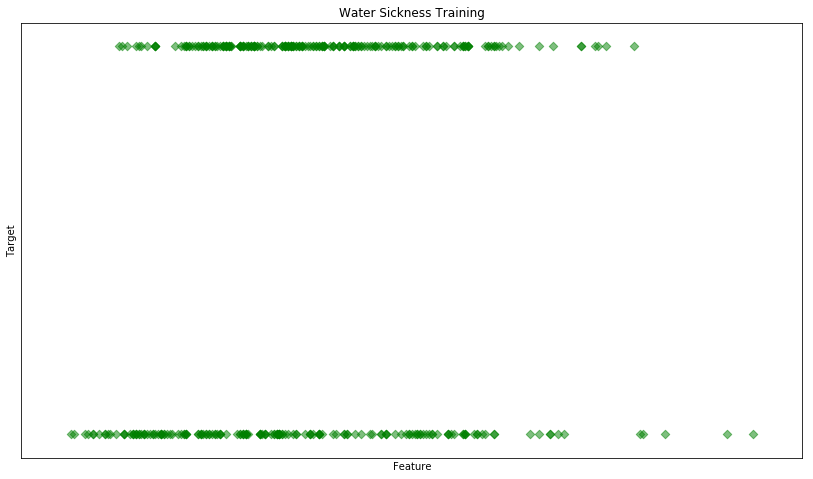

In [26]:
fig2 = plt.figure(figsize=(14, 8))
plt.title('Water Sickness Training')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.scatter(sickness_X_train, sickness_y_train,  color='green', alpha=0.5, marker='D')
plt.xticks(())
plt.yticks(())

plt.show()

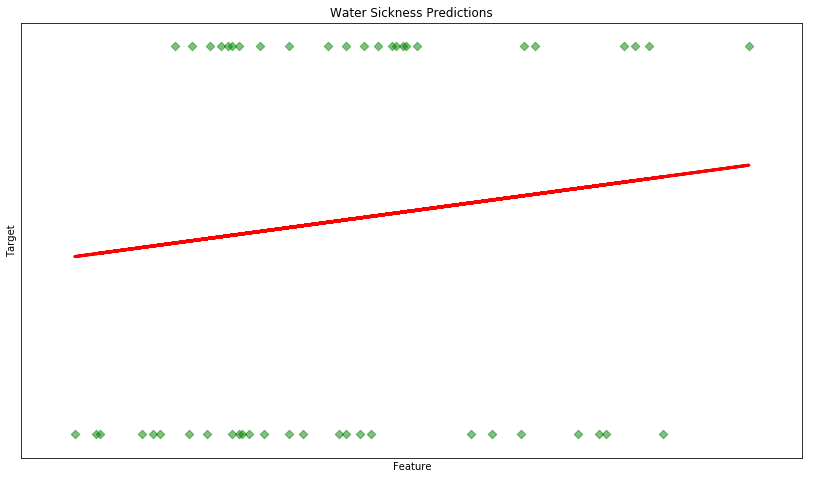

In [27]:
fig3 = plt.figure(figsize=(14, 8))
plt.title('Water Sickness Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.scatter(sickness_X_test, sickness_y_test,  color='green', alpha=0.5, marker='D')
plt.plot(sickness_X_test, sickness_y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [28]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [29]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [30]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-002A-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')

In [31]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-002A-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight')

In [32]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-002A-03.jpg'])
fig3.savefig(imagename, bbox_inches='tight')

In [33]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-06 12:18:40.319697
